Name: Christian Camilo Urcuqui Lopez

# Data analysis exercise

The notebook has the information about data analysis excercise using a csv file. 

Context: it is required to build a Jupyter notebook and share the findings of the exercise:
+ Journey across the different web pages for this customer
+ evar23 is the Customer ID

The notebook is divided in the next sections:
- Exploratory Data Analysis
- Insights and Conclusions

In [2]:
import pandas as pd

df = pd.read_csv('202308_DS.csv')
df.head()

,load_date,visit_search_engine_desc,visit_ref_type_desc,os_desc,language_desc,browser_desc,post_event_list_desc,carrier,daily_visitor,date_time,...,visit_referrer,visit_search_engine,visit_start_page_url,visit_start_pagename,visit_start_time_gmt,weekly_visitor,yearly_visitor,post_pagename,browser,os
0,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,"Clicks,Promo Clicks",NaN,0,2022-02-02 10:32,...,NaN,0,NaN,NaN,1643815769,0,0,NaN,259605553,1240087047
1,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:33,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/myplans,259605553,1240087047
2,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:33,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/fad,259605553,1240087047
3,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:33,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/fad/medical-index/specialities,259605553,1240087047
4,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:34,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/fad,259605553,1240087047


In [2]:
df.shape

(129, 431)

In [9]:
df.dtypes.value_counts()

float64    297
object      98
int64       36
Name: count, dtype: int64

+ As we can see the file has a shape of 129 registers and 431 features.
+ Some of the features has NaN in their registers
+ Loading the dataset we have 98 categorical features and the rest are numerical 

In [31]:
df.columns[df.columns.str.lower().str.contains("id")]

Index(['hitid_high', 'hitid_low', 'post_browser_width', 'post_cust_visid',
       'post_evar1_account_id', 'post_evar6_group_id', 'post_evar18_pcp_id',
       'post_evar23_user_id', 'post_evar27_fad_provider_specialty',
       'post_evar37_procedure_id', 'post_evar42_site_search_results_page_id',
       'post_evar45_url_parameter_network_id',
       'post_evar47_url_parameter_field_specialty_ids',
       'post_evar49_url_parameter_locationid',
       'post_evar50_provider_reports_viewed', 'post_evar51_provider_user_id',
       'post_evar52_provider_user_role', 'post_evar53_provider_user_type',
       'post_evar54_provider_organization', 'post_evar55_provider_agent_name',
       'post_evar56_provider_npi', 'post_evar57_provider_specialty',
       'post_evar58_provider_id', 'post_evar59_provider_client_associate',
       'post_evar61_provider_aqc',
       'post_evar63_url_parameter_search_specialty_id',
       'post_evar64_url_parameter_saved_search_id',
       'post_evar65_broker_userid

In [35]:
df.columns[df.columns.str.lower().str.contains("evar23")]

Index(['post_evar23_user_id', 'post_evar230', 'post_evar231', 'post_evar232',
       'post_evar233', 'post_evar234', 'post_evar235', 'post_evar236',
       'post_evar237', 'post_evar238', 'post_evar239'],
      dtype='object')

As we can see there are not a specific column with the name Customer ID, I suppose that evar23 is related to the column *post_evar23_user_id*

In [34]:
df.post_evar23_user_id.value_counts()

post_evar23_user_id
00f55f7d9f917b8cf1e1887922baa4eaa1a6ad82    129
Name: count, dtype: int64

In [56]:
df.columns[df.columns.str.lower().str.contains("page")]

Index(['first_hit_page_url', 'first_hit_pagename', 'post_clickmappage',
       'post_evar2_page_name', 'post_evar25_page_url',
       'post_evar42_site_search_results_page_id',
       'post_evar104_homepage_content_zones',
       'post_evar105_homepage_content_positions',
       'post_evar117_fad_homepage_text', 'post_page_event',
       'post_page_event_var1', 'post_page_event_var2', 'post_page_event_var3',
       'post_page_type', 'post_page_url', 'post_pagename_no_url',
       'post_prop7_page_title', 'post_prop8_page_url',
       'post_prop37_homepage_zone', 'post_prop38_homepage_position',
       'post_prop39_fad_homepage_text', 'search_page_num', 'visit_page_num',
       'visit_start_page_url', 'visit_start_pagename', 'post_pagename'],
      dtype='object')

Some of the columns that are interested to perform the analysis are:
+ date_time
+ post_evar23_user_id

<Axes: xlabel='date_time'>

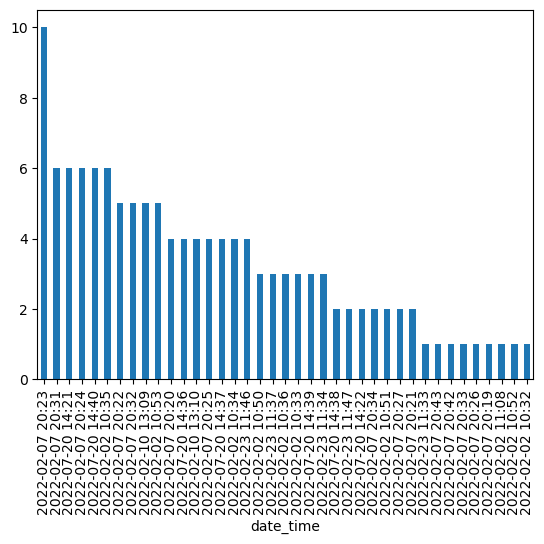

In [49]:
df.date_time.value_counts().plot.bar()

In [5]:
df.select_dtypes("object").shape

(129, 98)

In [6]:
df.select_dtypes("int").shape

(129, 36)

In [17]:
df["date_time"] = pd.to_datetime(df.date_time)

In [ ]:
import pandas as pd
import networkx as nx

data  = pd.DataFrame({'src':[1,2], 'dst':[2,1], 'attr_1':['foo', 'bar'], 'time':[pd.Timestamp.now(), pd.Timestamp.now()]})
G = nx.from_pandas_edgelist(data, source='src',
                            target='dst',
                           edge_attr=['attr_1', 'time'],
                           create_using= nx.MultiGraph())
nx.write_gexf(G, "visualization.gexf")

In [29]:
import pandas as pd
import networkx as nx
df_two = df.loc[:,["date_time","post_page_event_var2", "visit_start_pagename"]].dropna().copy()

G = nx.from_pandas_edgelist(df_two.dropna(), target='post_page_event_var2',
                            source='visit_start_pagename',
                           edge_attr=['date_time'],
                           create_using= nx.MultiGraph())

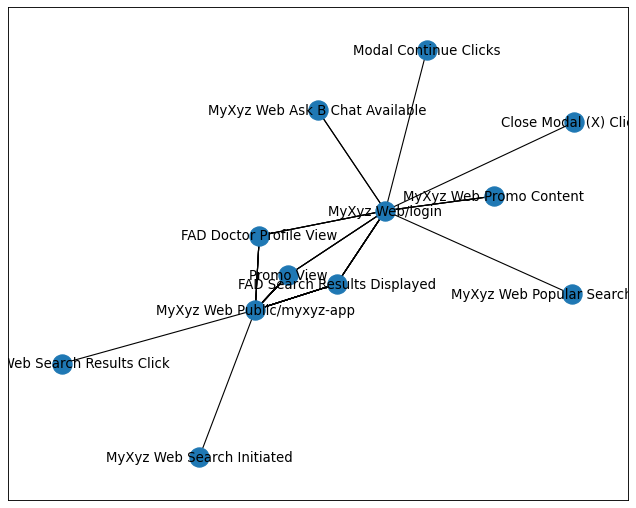

In [30]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

nx.draw_networkx(G)

In [10]:
# ', 'post_page_event_var2',
df.post_page_event_var2.value_counts()

post_page_event_var2
Promo View                            23
FAD Search Results Displayed          22
FAD Doctor Profile View               11
MyXyz Web Promo Content                4
MyXyz Web Body Tabs                    2
MyXyz Web Ask B Chat Available         2
MyXyz Web Search Initiated             1
MyXyz Web Search Results Click         1
MyXyz Web Popular Search Initiated     1
Close Modal (X) Clicks                 1
Modal Continue Clicks                  1
Name: count, dtype: int64

In [3]:
df.visit_start_pagename.value_counts()

visit_start_pagename
MyXyz Web Public/myxyz-app    51
MyXyz Web/login               40
Name: count, dtype: int64

In [26]:
df.loc[:,["date_time","post_page_event_var2", "visit_start_pagename"]].dropna()

,date_time,post_page_event_var2,visit_start_pagename
29,2022-02-07 20:19:00,Promo View,MyXyz Web Public/myxyz-app
30,2022-02-07 20:20:00,MyXyz Web Search Initiated,MyXyz Web Public/myxyz-app
32,2022-02-07 20:20:00,MyXyz Web Search Results Click,MyXyz Web Public/myxyz-app
34,2022-02-07 20:21:00,FAD Search Results Displayed,MyXyz Web Public/myxyz-app
37,2022-02-07 20:22:00,FAD Doctor Profile View,MyXyz Web Public/myxyz-app
38,2022-02-07 20:22:00,Promo View,MyXyz Web Public/myxyz-app
39,2022-02-07 20:22:00,Promo View,MyXyz Web Public/myxyz-app
41,2022-02-07 20:23:00,FAD Search Results Displayed,MyXyz Web Public/myxyz-app
43,2022-02-07 20:23:00,FAD Doctor Profile View,MyXyz Web Public/myxyz-app
44,2022-02-07 20:23:00,Promo View,MyXyz Web Public/myxyz-app


In [24]:
df.dropna(how='all')

,load_date,visit_search_engine_desc,visit_ref_type_desc,os_desc,language_desc,browser_desc,post_event_list_desc,carrier,daily_visitor,date_time,...,visit_referrer,visit_search_engine,visit_start_page_url,visit_start_pagename,visit_start_time_gmt,weekly_visitor,yearly_visitor,post_pagename,browser,os
0,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,"Clicks,Promo Clicks",NaN,0,2022-02-02 10:32:00,...,NaN,0,NaN,NaN,1643815769,0,0,NaN,259605553,1240087047
1,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:33:00,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/myplans,259605553,1240087047
2,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:33:00,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/fad,259605553,1240087047
3,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:33:00,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/fad/medical-index/specialities,259605553,1240087047
4,38:31.0,NaN,Typed/Bookmarked,Windows 10,English (United States),Google Chrome 97.0,NaN,NaN,0,2022-02-02 10:34:00,...,NaN,0,NaN,NaN,1643815769,0,0,MyXyz Web/fad,259605553,1240087047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,28:16.0,Google,Search Engines,Windows 10,English (United States),Google Chrome 103.0,Clicks,NaN,0,2022-07-20 14:40:00,...,https://www.google.com/,57,https://member.clientxyz.com/login,MyXyz Web/login,1658341267,0,0,NaN,852653394,1240087047
125,28:16.0,Google,Search Engines,Windows 10,English (United States),Google Chrome 103.0,NaN,NaN,0,2022-07-20 14:40:00,...,https://www.google.com/,57,https://member.clientxyz.com/login,MyXyz Web/login,1658341267,0,0,MyXyz Web/sso/heathequity,852653394,1240087047
126,28:16.0,Google,Search Engines,Windows 10,English (United States),Google Chrome 103.0,NaN,NaN,0,2022-07-20 14:40:00,...,https://www.google.com/,57,https://member.clientxyz.com/login,MyXyz Web/login,1658341267,0,0,MyXyz Web/fad/doctor-profile,852653394,1240087047
127,28:16.0,Google,Search Engines,Windows 10,English (United States),Google Chrome 103.0,NaN,NaN,0,2022-07-20 14:40:00,...,https://www.google.com/,57,https://member.clientxyz.com/login,MyXyz Web/login,1658341267,0,0,MyXyz Web/fad/search-results,852653394,1240087047
